<a href="https://colab.research.google.com/github/haneulllll/DataStudy/blob/main/%ED%95%84%EC%88%98_%EC%9D%B4%ED%95%9C%EC%9D%8486_0324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fancyimpute  # fancyimpute 모듈 설치

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.8 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29881 sha256=ef465d58eb58725ba26c188e60553fdf7aeaa2e4f0f0fe7db1b04f5e0c29ba62
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11330 sha256=236e5a6f2eea673723b4fefe111e18a016951b4e863e7a831cfefe832eb9c6e8
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
import numpy as np  # 수치계산 라이브러리
import pandas as pd  # 숫자/시계열 데이터 조작/분석하는 라이브러리
import matplotlib.pyplot as plt  # 시각화하기 위한 라이브러리
import seaborn as sns  # 통계데이터 시각화 라이브러리
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import IterativeImputer

In [ ]:
#사이킷런 제공하는 캘리포니아 집값 데이터 셋 불러오는 코드
from sklearn.datasets import fetch_california_housing

# 캘리포니아 주택 가격 데이터셋 로드
housing = fetch_california_housing()

# 데이터프레임 생성
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)

# 목표 변수 추가
df_housing['Target'] = housing.target

#MedInc: 해당 지역의 중간 소득. 이 값은 수천 달러 단위로 표현됩니다. 중간 소득이 높을수록 해당 지역의 주민들은 더 많은 돈을 벌고 있다는 것을 의미합니다.
#HouseAge: 해당 지역의 중앙값 주택 연령. 이는 지역에 있는 주택들 중간의 연령을 나타냅니다.
#AveRooms: 지역의 평균 방 갯수. 이 값은 해당 지역의 모든 주택의 방 수를 평균낸 것입니다.
#AveBedrms: 지역의 평균 침실 갯수. 이 값은 해당 지역의 모든 주택의 침실 수를 평균낸 것입니다.
#Population: 해당 지역의 인구. 이는 해당 지역에 살고 있는 사람들의 수를 나타냅니다.
#AveOccup: 평균 주택 점유율. 이는 한 주택에 평균적으로 거주하는 사람의 수를 나타냅니다.
#Latitude: 해당 지역의 위도입니다.
#Longitude: 해당 지역의 경도입니다.
#Target: 이는 해당 지역의 중앙값 주택 가격을 나타냅니다. 이 값은 수십만 달러 단위로 표현됩니다.

df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


**원본(결측치X) 데이터 시각화**

lineplot() : seaborn 라이브러리의 선그래프를 그리는 함수

<marker로 표시 가능한 모양>
* 's' : 사각형
* 'o' : 원
* 'D' :마름모
* '*' : 별

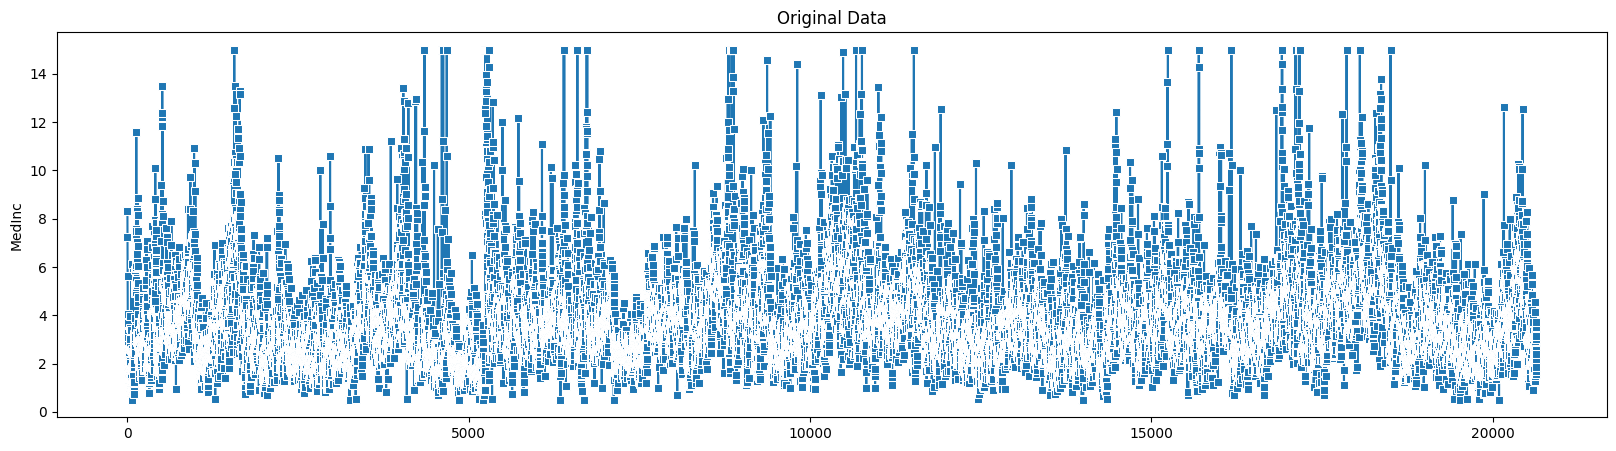

In [ ]:
plt.figure(figsize=(20,5))  # 가로10,세로5인치 크기의 그래프 생성
sns.lineplot(data=df_housing['MedInc'], marker='s')  # df_housing의 MedInc 데이터를 선으로 시각화/각 정점들을 사각형으로 표시
plt.title('Original Data')  # 그래프 제목 설정
plt.show()  # 그래프 보이기

**MedInc 열에 결측값을 생성**

In [ ]:
df_housing.loc[5:15, 'MedInc'] = np.nan
df_housing.loc[30:60, 'MedInc'] = np.nan
df_housing.loc[100:200, 'MedInc'] = np.nan
df_housing.loc[10000:15000, 'MedInc'] = np.nan

In [ ]:
df_housing[0:15]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,NaN,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,NaN,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,NaN,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,NaN,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,NaN,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


**원본(결측치ㅇ) 데이터 시각화**

lineplot() : seaborn 라이브러리의 선그래프를 그리는 함수

<marker로 표시 가능한 모양>
* 's' : 사각형
* 'o' : 원
* 'D' :마름모
* '*' : 별

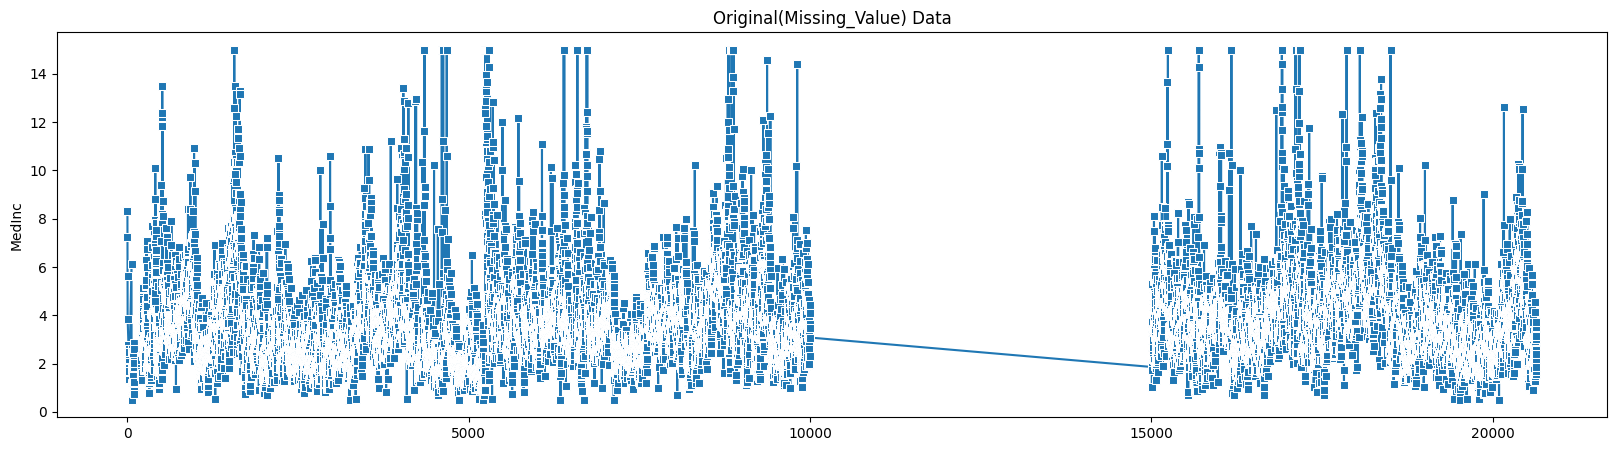

In [ ]:
plt.figure(figsize=(20,5))  # 가로20,세로5인치 크기의 그래프 생성
sns.lineplot(data=df_housing['MedInc'], marker='s')  # df_housing의 MedInc 데이터를 선으로 시각화/각 정점들을 사각형으로 표시
plt.title('Original(Missing_Value) Data')  # 그래프 제목 설정
plt.show()  # 그래프 보이기

**다양한 방법으로 결측치 대체하기**

In [ ]:
# 1. 1차 선형보간법, interpolate
df_linear = df_housing.interpolate(method = 'linear')

# 1. 2차 선형보간법, interpolate
df_quadratic = df_housing.interpolate(method = 'quadratic')

# 3. 평균대치법
imputer_mean = SimpleImputer(strategy='mean')
df_mean = imputer_mean.fit_transform(df_housing)
df_mean = pd.DataFrame(df_mean, columns = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','Target'])  # 새로운 dataframe 생성

# 4. 0으로 대체
df_zero = df_housing.fillna(0)

# 5. KNN(이웃하는 값들을 사용하여 대체하는 알고리즘)
imputer_knn = KNNImputer(n_neighbors = 500)  # 결측값 주변 100개의 값들을 이용하여 대체하는 객체(Imputer) 생성
df_knn = imputer_knn.fit_transform(df_housing)  # df_housing의 결측값을 Imputer로 대체한 후 df_knn에 저장
df_knn = pd.DataFrame(df_knn, columns = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','Target'])  # 새로운 dataframe 생성

# 6. MICE 다중대치법 (베이지안 회귀로 결측치를 대체)
mice_imputer = IterativeImputer()
df_mice = mice_imputer.fit_transform(df_housing)
df_mice = pd.DataFrame(df_mice, columns = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude','Target'])

In [ ]:
df_mean[10000:10005]  # 3번 방법을 이용한 결측치 대체 결과 확인

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
10000,3.846689,13.0,6.811111,1.018519,752.0,2.785185,39.02,-121.08,2.096
10001,3.846689,10.0,6.317073,1.083624,827.0,2.881533,39.05,-121.07,1.821
10002,3.846689,9.0,7.129129,1.117117,884.0,2.654655,39.04,-121.07,2.064
10003,3.846689,12.0,6.625442,1.084806,806.0,2.848057,39.05,-121.03,1.952
10004,3.846689,14.0,6.325670,1.068966,633.0,2.425287,39.04,-121.06,1.948


In [ ]:
df_zero[10000:10005]  # 4번 방법을 이용한 결측치 대체 결과 확인

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
10000,0.0,13.0,6.811111,1.018519,752.0,2.785185,39.02,-121.08,2.096
10001,0.0,10.0,6.317073,1.083624,827.0,2.881533,39.05,-121.07,1.821
10002,0.0,9.0,7.129129,1.117117,884.0,2.654655,39.04,-121.07,2.064
10003,0.0,12.0,6.625442,1.084806,806.0,2.848057,39.05,-121.03,1.952
10004,0.0,14.0,6.325670,1.068966,633.0,2.425287,39.04,-121.06,1.948


In [ ]:
df_knn[10000:10005]  # 5번 방법을 이용한 결측치 대체 결과 확인

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
10000,3.919784,13.0,6.811111,1.018519,752.0,2.785185,39.02,-121.08,2.096
10001,4.205657,10.0,6.317073,1.083624,827.0,2.881533,39.05,-121.07,1.821
10002,3.929118,9.0,7.129129,1.117117,884.0,2.654655,39.04,-121.07,2.064
10003,4.116854,12.0,6.625442,1.084806,806.0,2.848057,39.05,-121.03,1.952
10004,3.881067,14.0,6.325670,1.068966,633.0,2.425287,39.04,-121.06,1.948


In [ ]:
df_mice[10000:10005]  # 6번 방법을 이용한 결측치 대체 결과 확인

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
10000,5.194606,13.0,6.811111,1.018519,752.0,2.785185,39.02,-121.08,2.096
10001,4.382420,10.0,6.317073,1.083624,827.0,2.881533,39.05,-121.07,1.821
10002,5.113115,9.0,7.129129,1.117117,884.0,2.654655,39.04,-121.07,2.064
10003,4.698301,12.0,6.625442,1.084806,806.0,2.848057,39.05,-121.03,1.952
10004,4.489114,14.0,6.325670,1.068966,633.0,2.425287,39.04,-121.06,1.948


**결측치 대체결과 비교 (시각화)**

lineplot(data = __ , marker = __ , ax= __ , legend = __)
* legend : 그래프의 범례설정

Text(0.5, 1.0, 'df_mice')

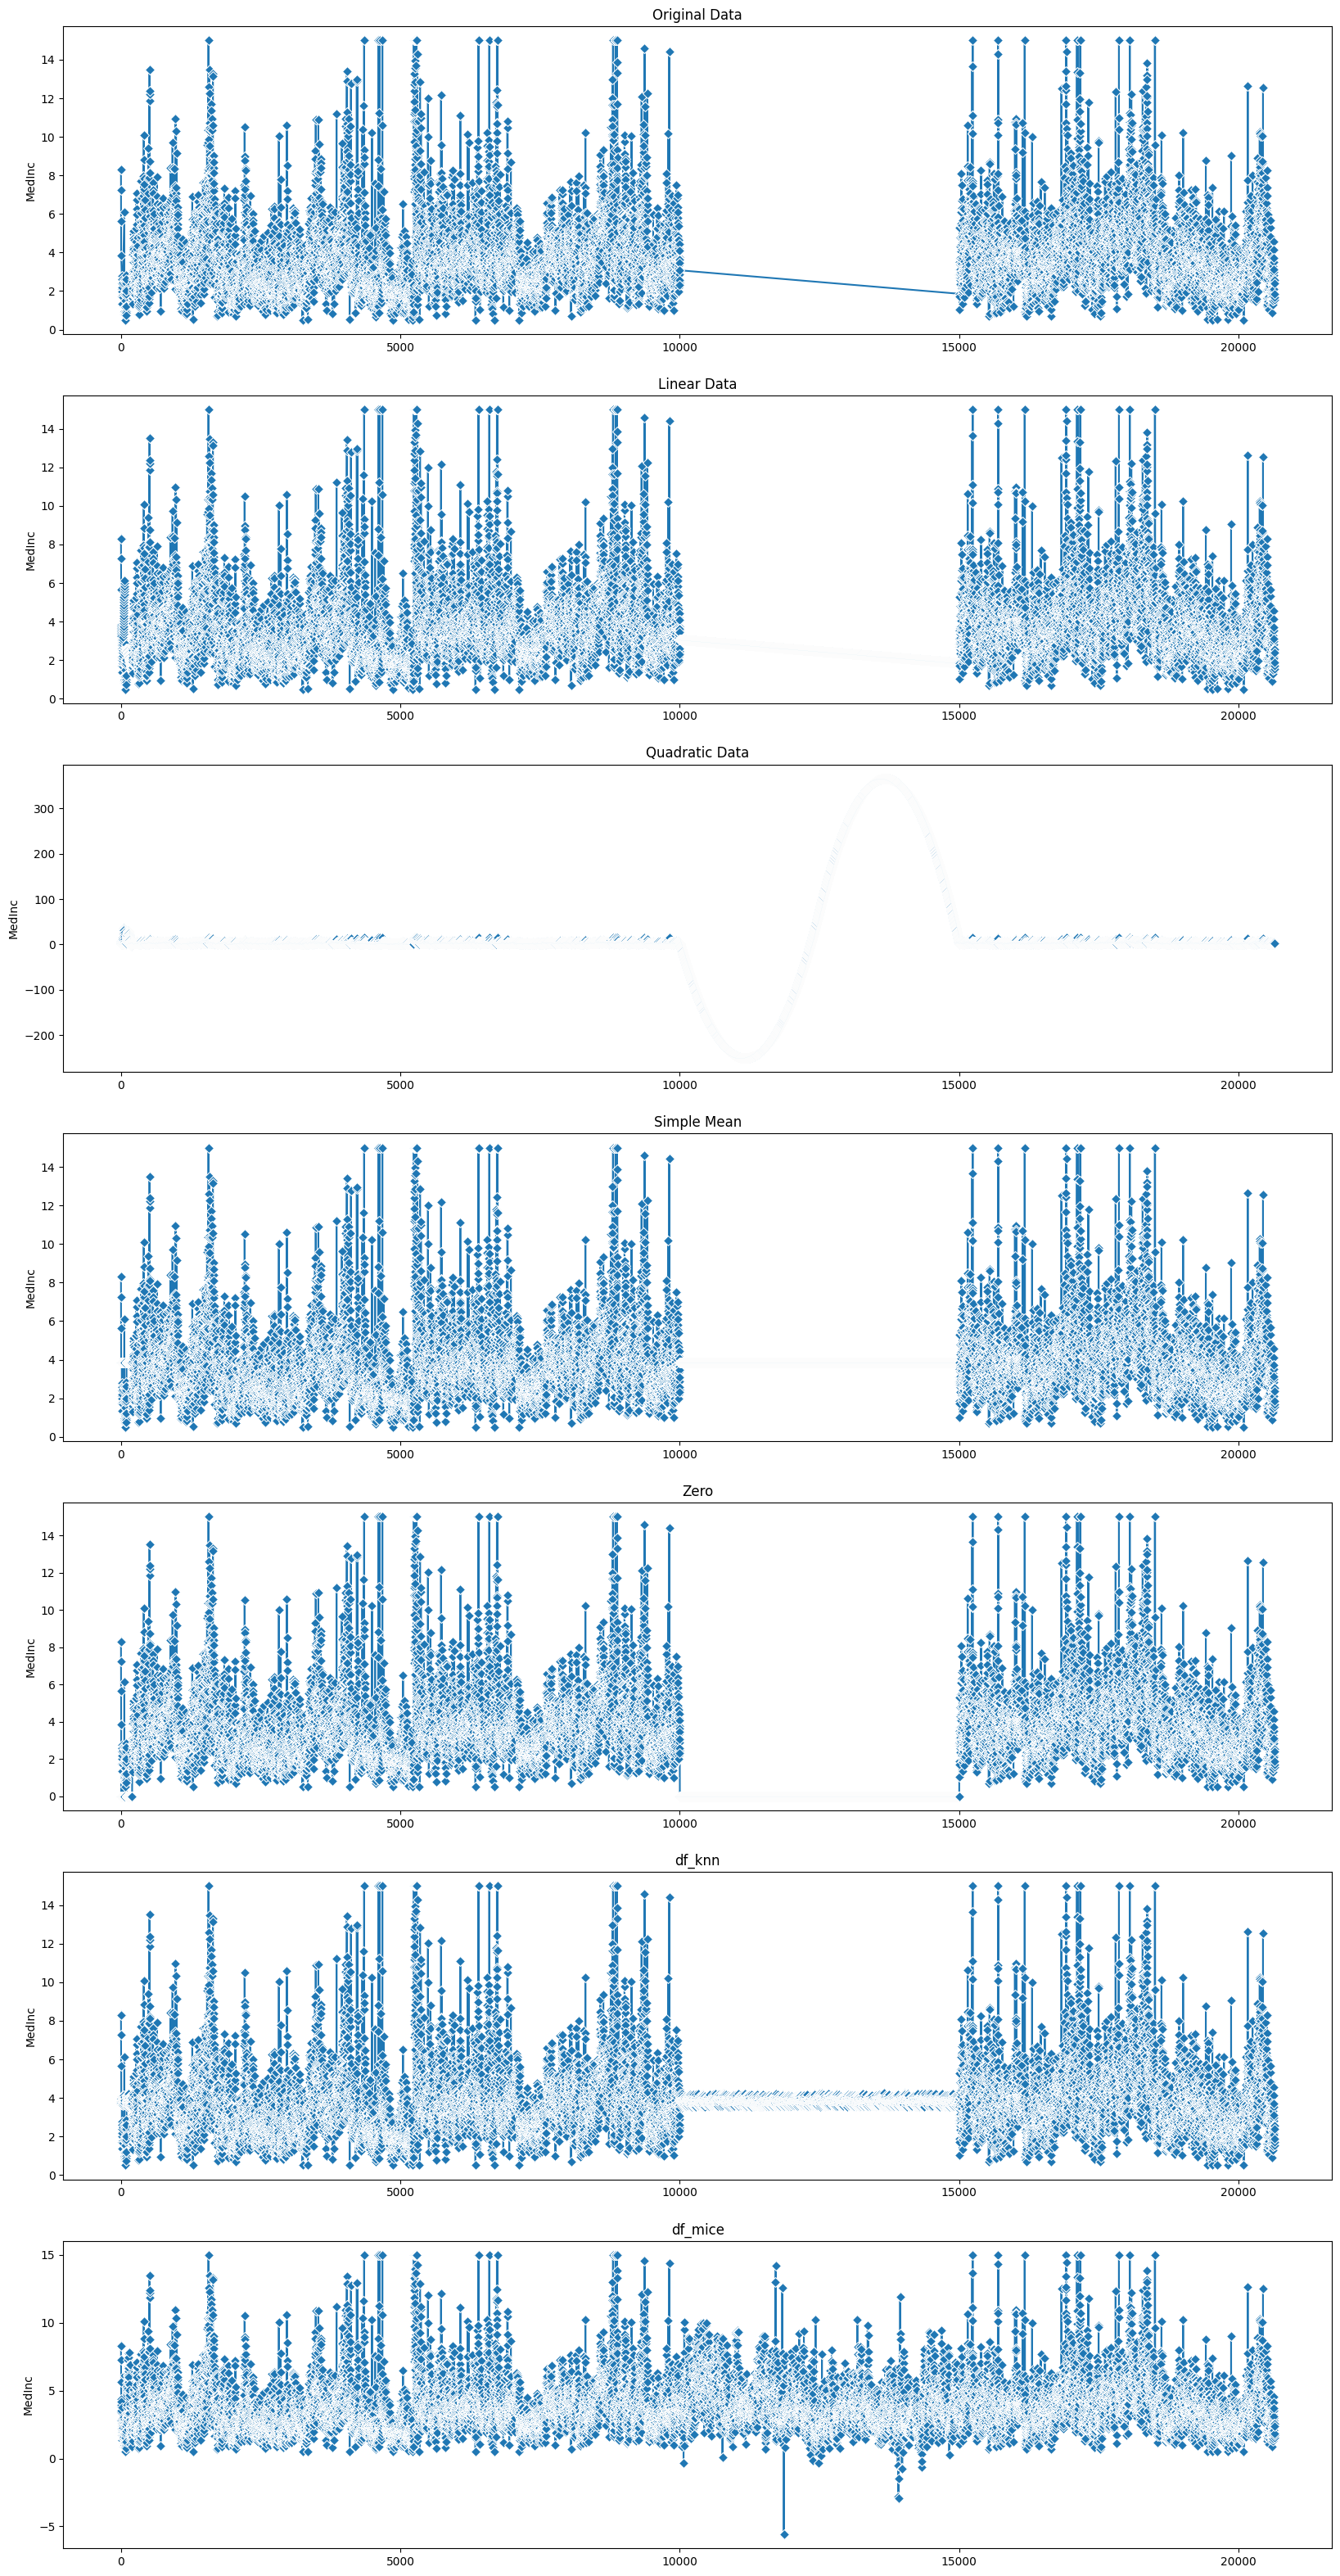

In [ ]:
fig, axs = plt.subplots(7,1,figsize=(20,40))
# 여러개의 그래프(7행 1열)를 포함하는 subplot을 생성/ 크기는 가로 20,세로40으로 설정
# 생성된 figure 객체는 fig에 저장
# 생성된 subplot들은 axs에 저장
sns.lineplot(data= df_housing['MedInc'], marker='D', ax=axs[0], legend='auto')
axs[0].set_title('Original Data')
sns.lineplot(data=df_linear['MedInc'] , marker='D', ax=axs[1], legend='auto')
axs[1].set_title('Linear Data')
sns.lineplot(data=df_quadratic['MedInc'] , marker='D', ax=axs[2], legend='auto')
axs[2].set_title('Quadratic Data')
sns.lineplot(data=df_mean['MedInc'] , marker='D', ax=axs[3], legend='auto')
axs[3].set_title('Simple Mean')
sns.lineplot(data=df_zero['MedInc'] , marker='D', ax=axs[4], legend='auto')
axs[4].set_title('Zero')
sns.lineplot(data=df_knn['MedInc'] , marker='D', ax=axs[5], legend='auto')
axs[5].set_title('df_knn')
sns.lineplot(data=df_mice['MedInc'] , marker='D', ax=axs[6], legend='auto')
axs[6].set_title('df_mice')

**Group BY 하기** *MedInc 피처를 기준으로 그룹화 진행*
-> 보통 10개구간으로 나누어 비교한다.

In [ ]:
grouped_original = df_housing.groupby(pd.cut(df_housing['MedInc'], bins=10))
grouped_linear = df_linear.groupby(pd.cut(df_linear['MedInc'], bins=10))
grouped_quadratic = df_quadratic.groupby(pd.cut(df_quadratic['MedInc'], bins=10))
grouped_mean = df_mean.groupby(pd.cut(df_mean['MedInc'], bins=10))
grouped_zero = df_zero.groupby(pd.cut(df_zero['MedInc'], bins=10))
grouped_knn = df_knn.groupby(pd.cut(df_knn['MedInc'], bins=10))
grouped_mice = df_mice.groupby(pd.cut(df_mice['MedInc'], bins=10))


In [ ]:
for name, group in grouped_original:
    print("Group:", name)
    print(group.corr()['MedInc'])
    print()

Group: (0.485, 1.95]
MedInc        1.000000
HouseAge      0.015152
AveRooms      0.038089
AveBedrms    -0.040278
Population    0.159284
AveOccup      0.011948
Latitude      0.015880
Longitude     0.005616
Target       -0.059490
Name: MedInc, dtype: float64

Group: (1.95, 3.4]
MedInc        1.000000
HouseAge     -0.017456
AveRooms      0.106360
AveBedrms    -0.003683
Population    0.000213
AveOccup     -0.141622
Latitude     -0.034134
Longitude    -0.026502
Target        0.279376
Name: MedInc, dtype: float64

Group: (3.4, 4.85]
MedInc        1.000000
HouseAge     -0.042853
AveRooms      0.095096
AveBedrms    -0.005703
Population    0.001638
AveOccup      0.008099
Latitude     -0.023485
Longitude    -0.018893
Target        0.173884
Name: MedInc, dtype: float64

Group: (4.85, 6.3]
MedInc        1.000000
HouseAge     -0.051026
AveRooms      0.130259
AveBedrms    -0.032829
Population    0.026044
AveOccup      0.004737
Latitude      0.006757
Longitude    -0.018362
Target        0.247316
Name